In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from knn_impute import *
from sklearn.linear_model import LinearRegression, BayesianRidge, ARDRegression, SGDRegressor, LogisticRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from impyute.imputation.cs import fast_knn
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import BaggingRegressor, VotingRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline, Pipeline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('dataset(column duplication app, version.alireza).xls')
initial_pain = df['Pain Level - Initial']
onehr_pain = df['Pain Level - After 1 hour']
X = df[['Age','Height', 'Weight', 'Pain Level - Initial', 'Time', 'Radiation Dose', 'Citanest % 2 (cc)', 'Bupivakain % 5 (cc)', 'Steroid (mg)', 'Iohexol 300 mg/ml (cc)']]
X = pd.DataFrame(X, dtype=float)
imputed_X = fast_knn(X, k=30)
y = np.array(abs(initial_pain - onehr_pain))
imputed_y = fast_knn(np.array(df[['Pain Level - Initial', 'Pain Level - After 1 hour']]), k=30)
imputed_y = abs(imputed_y[:,0] - imputed_y[:,1])

In [3]:
def plotErrorScores(error1, error2, error3, filename, title):
    labels = ['MAE', 'MSE', 'R2']
    index = np.arange(len(labels))
    plotter = plt.bar(index, [error1, error2, error3])
    plotter[0].set_color('r'), plotter[1].set_color('b'), plotter[2].set_color('y')
    plt.xlabel('Error Algorithms', fontsize=10)
    plt.ylabel('Error Algorithms\'s Scores', fontsize=10)
    plt.xticks(index, labels, fontsize=10, rotation=30)
    plt.ylim((0, 5))
    plt.title(title)
    plt.legend((plotter[0], plotter[1], plotter[2]), (error1, error2, error3))
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

### Baseline Approach: Linear Regression is model, NaN replaced by zero

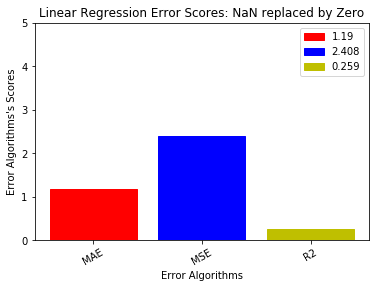

In [4]:
X = np.array(X)
X[np.isnan(X)] = 0.0
y[np.isnan(y)] = 0.0
pipe_lr = make_pipeline(StandardScaler(), LinearRegression(n_jobs=-1))
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y, test_size=0.3)
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
mae = round(mean_absolute_error(y_test, y_pred),3)
mse = round(mean_squared_error(y_test, y_pred),3)
r2 = round(r2_score(y_test, y_pred),3)
plotErrorScores(mae, mse, r2, 'LinearRegression error scores (baseline app, nan replaced by 0)', 'Linear Regression Error Scores: NaN replaced by Zero')

### Baseline Approach: Linear Regression is model, KNN-based imputation applied

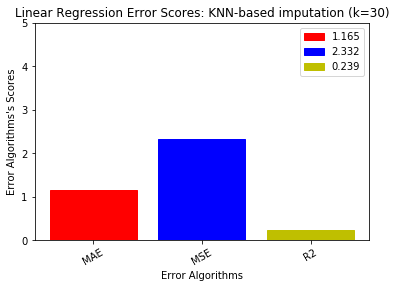

In [5]:
pipe_lr_knn = make_pipeline(StandardScaler(), LinearRegression(n_jobs=-1))
X_train, X_test, y_train, y_test = train_test_split(imputed_X, imputed_y, random_state=0, stratify=y, test_size=0.3)
pipe_lr_knn.fit(X_train, y_train)
y_pred = pipe_lr_knn.predict(X_test)
mae = round(mean_absolute_error(y_test, y_pred),3)
mse = round(mean_squared_error(y_test, y_pred),3)
r2 = round(r2_score(y_test, y_pred),3)
plotErrorScores(mae, mse, r2, 'LinearRegression, error scores (baseline app, knn imputation)', 'Linear Regression Error Scores: KNN-based imputation (k=30)')

### Baseline Approach: Bayesian Ridge is model, KNN-based imputation applied

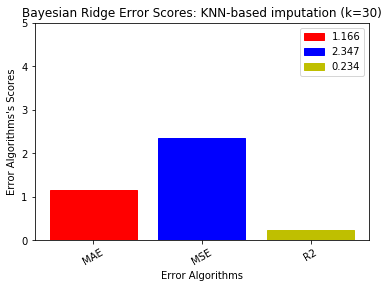

In [6]:
pipe_br_knn = make_pipeline(StandardScaler(), BayesianRidge())
pipe_br_knn.fit(X_train, y_train)
y_pred = pipe_br_knn.predict(X_test)
mae = round(mean_absolute_error(y_test, y_pred),3)
mse = round(mean_squared_error(y_test, y_pred),3)
r2 = round(r2_score(y_test, y_pred),3)
plotErrorScores(mae, mse, r2, 'BayesianRidge, error scores (baseline app, knn imputation)', 'Bayesian Ridge Error Scores: KNN-based imputation (k=30)')

### Baseline Approach: SVR is model, KNN-based imputation applied

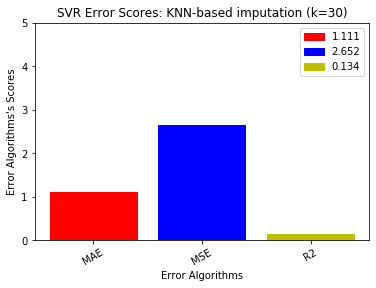

In [7]:
pipe_svr_knn = make_pipeline(StandardScaler(), SVR())
pipe_svr_knn.fit(X_train, y_train)
y_pred = pipe_svr_knn.predict(X_test)
mae = round(mean_absolute_error(y_test, y_pred),3)
mse = round(mean_squared_error(y_test, y_pred),3)
r2 = round(r2_score(y_test, y_pred),3)
plotErrorScores(mae, mse, r2, 'SVR, error scores (baseline app, knn imputation)', 'SVR Error Scores: KNN-based imputation (k=30)')

### Baseline Approach: KNeighbors is model, KNN-based imputation applied

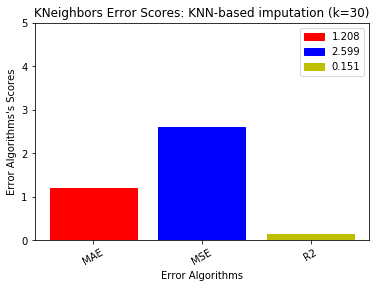

In [8]:
pipe_kn_knn = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=30, n_jobs=-1))
pipe_kn_knn.fit(X_train, y_train)
y_pred = pipe_kn_knn.predict(X_test)
mae = round(mean_absolute_error(y_test, y_pred),3)
mse = round(mean_squared_error(y_test, y_pred),3)
r2 = round(r2_score(y_test, y_pred),3)
plotErrorScores(mae, mse, r2, 'KNeighbors, error scores (baseline app, knn imputation)', 'KNeighbors Error Scores: KNN-based imputation (k=30)')

### Baseline Approach: ARD is model, KNN-based imputation applied

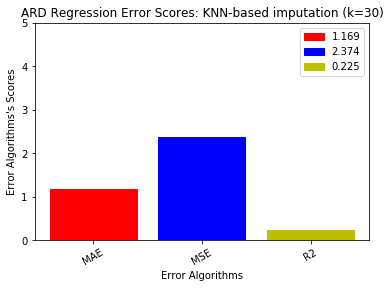

In [9]:
pipe_ard_knn = make_pipeline(StandardScaler(), ARDRegression())
pipe_ard_knn.fit(X_train, y_train)
y_pred = pipe_ard_knn.predict(X_test)
mae = round(mean_absolute_error(y_test, y_pred),3)
mse = round(mean_squared_error(y_test, y_pred),3)
r2 = round(r2_score(y_test, y_pred),3)
plotErrorScores(mae, mse, r2, 'ARD, error scores (baseline app, knn imputation)', 'ARD Regression Error Scores: KNN-based imputation (k=30)')

### Baseline Approach: SGD is model, KNN-based imputation applied

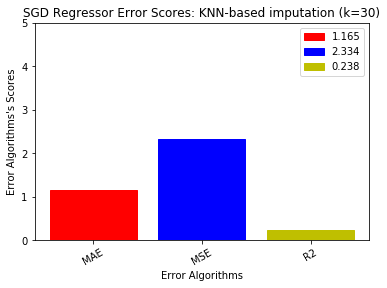

In [10]:
pipe_sgd_knn = make_pipeline(StandardScaler(), SGDRegressor())
pipe_sgd_knn.fit(X_train, y_train)
y_pred = pipe_sgd_knn.predict(X_test)
mae = round(mean_absolute_error(y_test, y_pred),3)
mse = round(mean_squared_error(y_test, y_pred),3)
r2 = round(r2_score(y_test, y_pred),3)
plotErrorScores(mae, mse, r2, 'SGD, error scores (baseline app, knn imputation)', 'SGD Regressor Error Scores: KNN-based imputation (k=30)')

### Baseline Approach: Majority Voting Regressor, KNN-based imputation applied

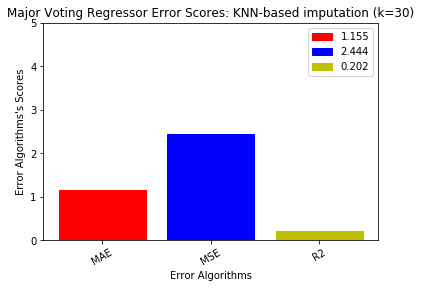

In [11]:
pipe1 = Pipeline([['sc', StandardScaler()], ['clf', LinearRegression()]])
clf2 = DecisionTreeRegressor(random_state=0)
pipe3 = Pipeline([['sc', StandardScaler()], ['clf', KNeighborsRegressor(n_jobs=-1)]])
mjvoting = VotingRegressor(estimators=[('lr',pipe1), ('dt',clf2), ('knn',pipe3)], n_jobs=-1)
mjvoting.fit(X_train, y_train)
y_pred = mjvoting.predict(X_test)
mae = round(mean_absolute_error(y_test, y_pred),3)
mse = round(mean_squared_error(y_test, y_pred),3)
r2 = round(r2_score(y_test, y_pred),3)
plotErrorScores(mae, mse, r2, 'majority voting, error scores (baseline app, knn imputation)', 'Major Voting Regressor Error Scores: KNN-based imputation (k=30)')

### Baseline Approach: AdaBoostRegressor is model, KNN-based imputation applied

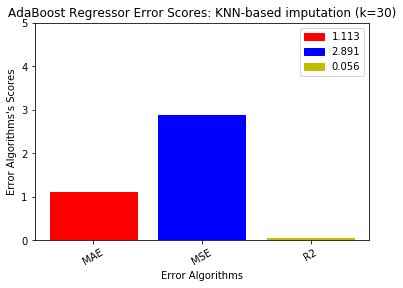

In [12]:
ada_boost = AdaBoostRegressor(base_estimator=clf2, n_estimators=500, random_state=0)
ada_boost.fit(X_train, y_train)
y_pred = ada_boost.predict(X_test)
mae = round(mean_absolute_error(y_test, y_pred),3)
mse = round(mean_squared_error(y_test, y_pred),3)
r2 = round(r2_score(y_test, y_pred),3)
plotErrorScores(mae, mse, r2, 'adaboost, error scores (baseline app, knn imputation)', 'AdaBoost Regressor Error Scores: KNN-based imputation (k=30)')

### Baseline Approach: BaggingRegressor is model, KNN-based imputation applied

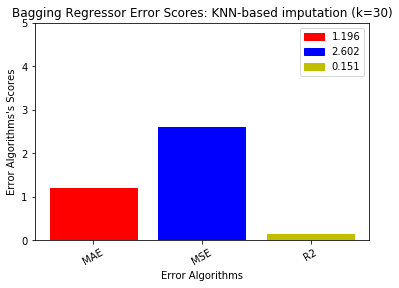

In [13]:
pipe_bagging = BaggingRegressor(clf2, n_estimators=500, random_state=0)
pipe_bagging.fit(X_train, y_train)
y_pred = pipe_bagging.predict(X_test)
mae = round(mean_absolute_error(y_test, y_pred),3)
mse = round(mean_squared_error(y_test, y_pred),3)
r2 = round(r2_score(y_test, y_pred),3)
plotErrorScores(mae, mse, r2, 'bagging, error scores (baseline app, knn imputation)', 'Bagging Regressor Error Scores: KNN-based imputation (k=30)')

### Baseline - X Models Approach

In [14]:
categorical_features = df[['Gender', 'Diagnosis_1', 'Diagnosis_2', 'R/L_1', 'R/L_2', 'Procedure_1', 'Procedure_2', 'Approach_1', 'Approach_2']]
categorical_features.fillna('0', inplace=True)
categorical_cols = pd.get_dummies(categorical_features).columns
encoder = OneHotEncoder()
encoded_categorical = (encoder.fit_transform(categorical_features)).toarray()
gender = encoded_categorical[:,:2]
diagnosis = encoded_categorical[:,2:145]
RL = encoded_categorical[:,145:157]
procedure = encoded_categorical[:,157:298]
approach = encoded_categorical[:,298:]

### Baseline - Gender Model

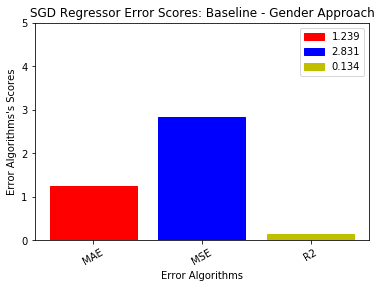

In [15]:
gender_X = np.hstack((gender, imputed_X))
X_train, X_test, y_train, y_test = train_test_split(gender_X, imputed_y, random_state=0, test_size=0.3)
pipe_sgd_gender = make_pipeline(StandardScaler(), SGDRegressor())
pipe_sgd_gender.fit(X_train, y_train)
y_pred = pipe_sgd_gender.predict(X_test)
mae = round(mean_absolute_error(y_test, y_pred),3)
mse = round(mean_squared_error(y_test, y_pred),3)
r2 = round(r2_score(y_test, y_pred),3)
plotErrorScores(mae, mse, r2, 'SGD, error scores (baseline gender)', 'SGD Regressor Error Scores: Baseline - Gender Approach')

### Baseline - Diagnosis Model

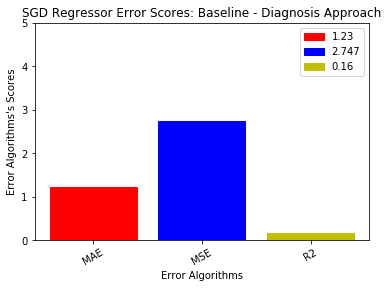

In [16]:
diagnosis_X = np.hstack((diagnosis, imputed_X))
X_train, X_test, y_train, y_test = train_test_split(diagnosis_X, imputed_y, random_state=0, test_size=0.3)
pipe_sgd_diag = make_pipeline(StandardScaler(), SGDRegressor())
pipe_sgd_diag.fit(X_train, y_train)
y_pred = pipe_sgd_diag.predict(X_test)
mae = round(mean_absolute_error(y_test, y_pred),3)
mse = round(mean_squared_error(y_test, y_pred),3)
r2 = round(r2_score(y_test, y_pred),3)
plotErrorScores(mae, mse, r2, 'SGD, error scores (baseline diagnosis)', 'SGD Regressor Error Scores: Baseline - Diagnosis Approach')

### Baseline - R/L Model

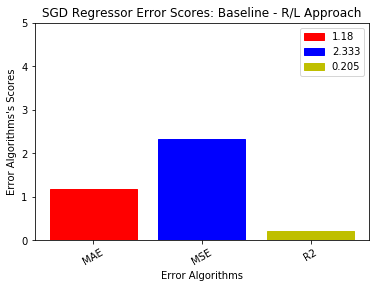

In [21]:
RL_X = np.hstack((RL, imputed_X))
X_train, X_test, y_train, y_test = train_test_split(RL_X, imputed_y, random_state=5, test_size=0.3)
pipe_sgd_rl = make_pipeline(StandardScaler(), SGDRegressor())
pipe_sgd_rl.fit(X_train, y_train)
y_pred = pipe_sgd_rl.predict(X_test)
mae = round(mean_absolute_error(y_test, y_pred),3)
mse = round(mean_squared_error(y_test, y_pred),3)
r2 = round(r2_score(y_test, y_pred),3)
plotErrorScores(mae, mse, r2, 'SGD, error scores (baseline RL)', 'SGD Regressor Error Scores: Baseline - R/L Approach')

### Baseline - Procedure Model

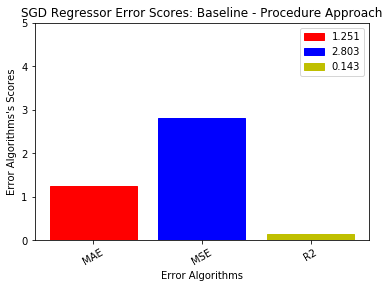

In [18]:
procedure_X = np.hstack((procedure, imputed_X))
X_train, X_test, y_train, y_test = train_test_split(procedure_X, imputed_y, random_state=0, test_size=0.3)
pipe_sgd_proc = make_pipeline(StandardScaler(), SGDRegressor())
pipe_sgd_proc.fit(X_train, y_train)
y_pred = pipe_sgd_proc.predict(X_test)
mae = round(mean_absolute_error(y_test, y_pred),3)
mse = round(mean_squared_error(y_test, y_pred),3)
r2 = round(r2_score(y_test, y_pred),3)
plotErrorScores(mae, mse, r2, 'SGD, error scores (baseline procedure)', 'SGD Regressor Error Scores: Baseline - Procedure Approach')

### Baseline - Approach Model

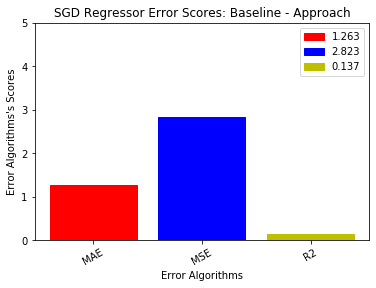

In [19]:
approach_X = np.hstack((approach, imputed_X))
X_train, X_test, y_train, y_test = train_test_split(approach_X, imputed_y, random_state=0, test_size=0.3)
pipe_sgd_app = make_pipeline(StandardScaler(), SGDRegressor())
pipe_sgd_app.fit(X_train, y_train)
y_pred = pipe_sgd_app.predict(X_test)
mae = round(mean_absolute_error(y_test, y_pred),3)
mse = round(mean_squared_error(y_test, y_pred),3)
r2 = round(r2_score(y_test, y_pred),3)
plotErrorScores(mae, mse, r2, 'SGD, error scores (baseline app)', 'SGD Regressor Error Scores: Baseline - Approach')